# Quickstart: Survey

learn how to generate a survey

In [1]:
from skysurvey import survey

/Users/rigault/miniforge3/lib/python3.9/site-packages/ztfquery-1.19.0-py3.9.egg/ztfquery/utils/tools.py:78: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray([v[0]*np.cos(theta*_DEG2RA) - v[2]*np.sin(theta*_DEG2RA),


let's start with two predefined survey. A generic HealpixSurvey (based on healpix sky segmentation) 
and a real one ZTF (based on polygon sky segmentation)

### Healpix Survey

In [2]:
hpsurvey = survey.HealpixSurvey(9)

Let's draw the equivalent of 4 years of observations assuming 1000 healpix pixel pointings per day

Remark that, as such mjd_range and size are drawn independenly so, 1000 pointing per day is an average. 

In [3]:
%%time
hpsurvey.draw_random(size=365*4*1000, # number of observation 
                     bands=["ztf:g","ztf:r","ztf:i"], # band to observed
                     mjd_range=[56000, 56000+365*4], # timerange of observation
                     skynoise_range=[180,210], # sky noise
                     ra_range=[-30,90], 
                    inplace=True)  # set the self.data and do not return a new HealpixSurvey

CPU times: user 1.45 s, sys: 105 ms, total: 1.56 s
Wall time: 1.56 s


Remark: you could have load it directly this way using the ``from_random`` classmethod

In [4]:
%%time
hpsurvey = survey.HealpixSurvey.from_random(nside=9, 
                                     size=365*4*1000, # number of observation 
                                     bands=["ztf:g","ztf:r","ztf:i"],
                                     mjd_range=[56000, 56000+365*4], 
                                     skynoise_range=[180,210], 
                                     ra_range=[-30,90])

CPU times: user 1.61 s, sys: 57.4 ms, total: 1.67 s
Wall time: 1.67 s


In [5]:
hpsurvey.data # Show the data generated. time, band sky noise, gain, zp and fieldid.

,index,mjd,band,skynoise,gain,zp,fieldid
0,471732,56000.001029,ztf:g,195.474200,1.0,25.0,194
1,557791,56000.002661,ztf:g,182.994548,1.0,25.0,291
2,341008,56000.004024,ztf:g,195.574587,1.0,25.0,477
3,545099,56000.004668,ztf:g,187.531129,1.0,25.0,293
4,1242103,56000.005212,ztf:i,197.519235,1.0,25.0,68
...,...,...,...,...,...,...,...
1459995,140123,57459.995756,ztf:g,206.279811,1.0,25.0,208
1459996,1267184,57459.996537,ztf:g,203.914667,1.0,25.0,394
1459997,843890,57459.997166,ztf:i,199.857356,1.0,25.0,649
1459998,966128,57459.997556,ztf:i,185.071792,1.0,25.0,695


Let's get the number of time a 'field' has been observed

In [6]:
hpsurvey.get_fieldstat("size") 

53     2189
580    2172
633    2171
379    2157
718    2157
       ... 
612    1925
122    1925
7      1925
4      1924
382    1921
Name: fieldid, Length: 720, dtype: int64

These are just short cut to pandas dataframe contained in self.data

So you can play.

Let's measure the number of observation we have per day and per band

In [7]:
data = hpsurvey.data.copy()
data["day"] = data["mjd"].astype(int)

In [8]:
dailybands = data.groupby(["day","band"]).size()
dailybands

day    band 
56000  ztf:g    329
       ztf:i    296
       ztf:r    323
56001  ztf:g    349
       ztf:i    309
               ... 
57458  ztf:i    348
       ztf:r    344
57459  ztf:g    347
       ztf:i    308
       ztf:r    354
Length: 4380, dtype: int64

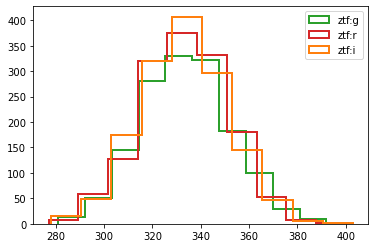

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot()

prop = dict(lw=2, histtype="step")
ax.hist(dailybands.xs("ztf:g", level=1), color="tab:green", label="ztf:g", **prop) 
ax.hist(dailybands.xs("ztf:r", level=1), color="tab:red", label="ztf:r",**prop)
ax.hist(dailybands.xs("ztf:i", level=1), color="tab:orange", label="ztf:i",**prop)
ax.legend(loc='best')

#### Get the field of a target

This is an important feature that enable us to know whic field contains which target

In [10]:
hpsurvey.radec_to_fieldid(40, 90)

189

In [13]:
import numpy as np
# remark that, doing that this way, it won't be homogeneous.
ra_flat = np.random.uniform(-30, 90, 1000)
dec_flat = np.random.uniform(0, 360, 1000)
hpsurvey.radec_to_fieldid(ra_flat, dec_flat)

array([637, 368, 525, 398, 230, 107, 206, 272, 702,  39, 547, 234, 327,
       618, 585,  68, 197, 150, 379, 586, 155, 439, 178,  15, 371, 255,
        58, 256,  57, 593, 359, 617, 286, 674, 276,   2, 267, 527, 509,
         1, 692, 302,   3, 742, 297,   2, 645,   3, 706, 201, 394,  80,
       299,   1, 134, 103,  22,  30, 650, 453, 142, 672, 404, 112, 107,
       387, 102, 441,  59, 201, 677,  32, 274, 495, 669,   1, 660, 429,
       609, 560,  22,   3, 135,  70, 167, 461,  33,   7, 342, 693,  27,
       349,  45, 356,  86,   1, 574,   2,   0, 612, 454, 174, 679, 127,
       338, 362,  68,  75, 648,   0, 414, 490, 129,  45,  37,  41,  74,
       332,  47,   3,  58,  84,  96, 172, 383, 176,  80, 373, 138, 159,
        27, 476, 343, 705,  79,  35, 464,  58, 651, 499,   3,  19, 506,
       563,   2, 488,   9, 389, 718, 672, 589, 618,  23,   0, 385,  17,
       207, 129, 623, 114, 301, 753,  45, 531, 466, 207, 555,  41, 555,
       134, 549, 171, 632, 541, 409,  86,  85, 545, 248, 698,   

### ZTF, a polygon survey

polygon survey are surveys which pointings are defined by a (potentially very long) list of fieldid. (see self.

In [14]:
from skysurvey.survey import ZTF

random is using the real ZTF field definition, but enables you to generate a random draw (unrealistic) as for HealpixSurvey

In [15]:
%%time
ztf = ZTF.from_random(size=365*4*1000, # number of observation 
                     bands=["ztf:g","ztf:r","ztf:i"], # band to observed
                     mjd_range=[56000, 56000+365*4], # timerange of observation
                     skynoise_range=[180,210], # sky noise
                     )

CPU times: user 1.58 s, sys: 56.6 ms, total: 1.64 s
Wall time: 1.64 s


In [16]:
data = ztf.data
data

,index,mjd,band,skynoise,gain,zp,fieldid
0,220180,56000.000756,ztf:r,193.413331,1.0,25.0,236
1,614832,56000.000939,ztf:i,206.701015,1.0,25.0,355
2,669487,56000.003010,ztf:r,191.778601,1.0,25.0,1558
3,933185,56000.003747,ztf:i,198.621483,1.0,25.0,1556
4,1240438,56000.003917,ztf:r,184.476005,1.0,25.0,1284
...,...,...,...,...,...,...,...
1459995,40415,57459.996991,ztf:i,196.604722,1.0,25.0,1329
1459996,194712,57459.997898,ztf:r,182.869078,1.0,25.0,627
1459997,752515,57459.998321,ztf:r,203.899547,1.0,25.0,1844
1459998,653554,57459.998580,ztf:i,194.109305,1.0,25.0,1517


If you have a list of observation have these data. load directly a ztf instance with that

In [17]:
%%time
other_ztf = ZTF(data=data)

CPU times: user 39.4 ms, sys: 11.3 ms, total: 50.7 ms
Wall time: 45.2 ms


In [18]:
other_ztf.get_fieldstat("size")

249     924
669     913
1086    911
1820    909
827     908
       ... 
14      749
424     746
1515    740
420     737
552     727
Name: fieldid, Length: 1776, dtype: int64

**Next let's join targets and survey**